[参考: Python: 時系列データの交差検証と TimeSeriesSplit の改良について](https://blog.amedama.jp/entry/time-series-cv)

In [3]:
!sw_vers
!python -V

ProductName:	macOS
ProductVersion:	11.4
BuildVersion:	20F71
Python 3.9.0


In [29]:
import pandas as pd
import seaborn as sns
from calendar import month_name
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt

In [24]:
# 航空機の旅客数を記録したデータセットを読み込む
df = sns.load_dataset('flights')
display("df:", df.head())

# 時系列のカラムを用意する
month_name_mappings = {name[:3]: str(n).zfill(2) for n, name in
                       enumerate(month_name)}
print("mappings:", month_name_mappings)
df['month'] = df['month'].apply(lambda x: month_name_mappings[x])
df['year-month'] = df.year.astype(str) + '-' + df.month.astype(str)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')
df.head()

'df:'

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


mappings: {'': '00', 'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}


,year,month,passengers,year-month
0,1949,01,112,1949-01-01
1,1949,02,118,1949-02-01
2,1949,03,132,1949-03-01
3,1949,04,129,1949-04-01
4,1949,05,121,1949-05-01


In [26]:
# データの並び順を元に分割する
folds = TimeSeriesSplit(n_splits=5)

index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
index of test: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
----------
index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
index of test: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
----------
index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
index of test: [72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
----------
index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

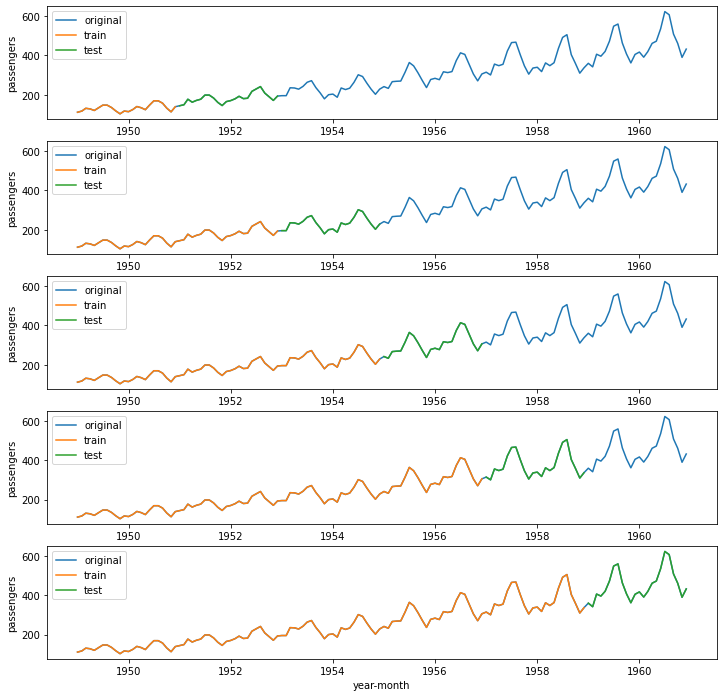

In [30]:
# 5枚のグラフを用意する
fig, axes = plt.subplots(5, 1, figsize=(12, 12))

# 学習用のデータとテスト用のデータに分割するためのインデックス情報を得る
for i, (train_index, test_index) in enumerate(folds.split(df)):
    # 生のインデックス
    print(f'index of train: {train_index}')
    print(f'index of test: {test_index}')
    print('----------')
    # 元のデータを描く
    sns.lineplot(data=df, x='year-month', y='passengers', ax=axes[i], label='original')
    # 学習用データを描く
    sns.lineplot(data=df.iloc[train_index], x='year-month', y='passengers', ax=axes[i], label='train')
    # テスト用データを描く
    sns.lineplot(data=df.iloc[test_index], x='year-month', y='passengers', ax=axes[i], label='test')

# グラフを表示する
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train, test in kf.split(df):
    print(train, test, end="\n\n")

[ 29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 13

In [49]:
import lightgbm as lgb
model = lgb.LGBMRegressor()

In [50]:
hasattr(model, "score")

True

In [51]:
model.score

<bound method RegressorMixin.score of LGBMRegressor()>